In [10]:
import gpflow as gpf
import numpy as np 
import scipy
import matplotlib.pyplot as plt
from cpgp.segcpgp_robust import SegCPGP

In [ ]:
def plot_model(model: gpf.models.GPModel, plot=True) -> None:
    X, Y = model.data
    opt = gpf.optimizers.Scipy()
    opt.minimize(model.training_loss, model.trainable_variables)
    if plot:
        gpf.utilities.print_summary(model, "notebook")
        Xplot = np.linspace(0.0, len(X), len(X))[:, None]

        y_mean, y_var = model.predict_y(Xplot, full_cov=False)
        y_lower = y_mean - 1.96 * np.sqrt(y_var)
        y_upper = y_mean + 1.96 * np.sqrt(y_var)

        _, ax = plt.subplots(nrows=1, ncols=1)
        ax.plot(X, Y, "kx", mew=2)
        (mean_line,) = ax.plot(Xplot, y_mean, "-")
        color = mean_line.get_color()
        ax.plot(Xplot, y_lower, lw=0.1, color=color)
        ax.plot(Xplot, y_upper, lw=0.1, color=color)
        ax.fill_between(
            Xplot[:, 0], y_lower[:, 0], y_upper[:, 0], color=color, alpha=0.1
        )

        # Also plot the inducing variables if possible:
        iv = getattr(model, "inducing_variable", None)
        if iv is not None:
            ax.scatter(iv.Z, np.zeros_like(iv.Z) + min(y), marker="^")
    return model
        

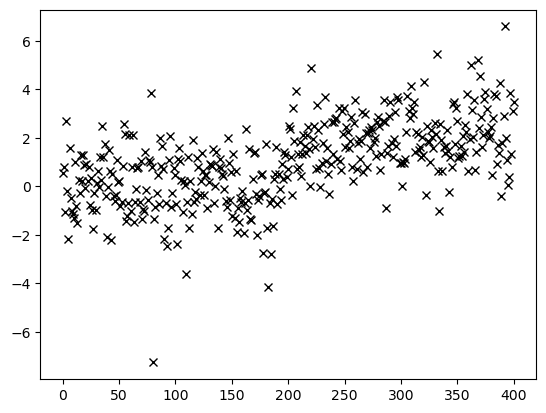

In [12]:
X = np.linspace(0, 400, 400).reshape(-1, 1).astype(float)
y = np.random.standard_t(5, len(X)).reshape(-1, 1)
y[200:] += 2
plt.plot(X, y, "kx")

50


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kernels[0].variance,Parameter,Softplus,,True,(),float64,0.0
GPR.kernel.kernels[1].variance,Parameter,Softplus,,True,(),float64,4.19481
GPR.kernel.locations,Parameter,Identity,,True,"(1,)",float64,[198.14938]
GPR.kernel.steepness,Parameter,Softplus,,True,(),float64,0.38309
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.62348


name,class,transform,prior,trainable,shape,dtype,value
SGPR.kernel.kernels[0].variance,Parameter,Softplus,,True,(),float64,0.0
SGPR.kernel.kernels[1].variance,Parameter,Softplus,,True,(),float64,4.19474
SGPR.kernel.locations,Parameter,Identity,,True,"(1,)",float64,[198.14921]
SGPR.kernel.steepness,Parameter,Softplus,,True,(),float64,0.38303
SGPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.6235
SGPR.inducing_variable.Z,Parameter,Identity,,True,"(15, 1)",float64,[[-2.0000000e-04...


308


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kernels[0].variance,Parameter,Softplus,,True,(),float64,0.38171
GPR.kernel.kernels[1].variance,Parameter,Softplus,,True,(),float64,5.02769
GPR.kernel.locations,Parameter,Identity,,True,"(1,)",float64,[303.92978]
GPR.kernel.steepness,Parameter,Softplus,,True,(),float64,4.33134
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,2.21499


name,class,transform,prior,trainable,shape,dtype,value
SGPR.kernel.kernels[0].variance,Parameter,Softplus,,True,(),float64,0.38171
SGPR.kernel.kernels[1].variance,Parameter,Softplus,,True,(),float64,5.02771
SGPR.kernel.locations,Parameter,Identity,,True,"(1,)",float64,[303.92979]
SGPR.kernel.steepness,Parameter,Softplus,,True,(),float64,4.33135
SGPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,2.21499
SGPR.inducing_variable.Z,Parameter,Identity,,True,"(15, 1)",float64,[[61.15288...


194


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kernels[0].variance,Parameter,Softplus,,True,(),float64,0.0
GPR.kernel.kernels[1].variance,Parameter,Softplus,,True,(),float64,4.20486
GPR.kernel.locations,Parameter,Identity,,True,"(1,)",float64,[198.14771]
GPR.kernel.steepness,Parameter,Softplus,,True,(),float64,0.38312
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.62348


name,class,transform,prior,trainable,shape,dtype,value
SGPR.kernel.kernels[0].variance,Parameter,Softplus,,True,(),float64,0.0
SGPR.kernel.kernels[1].variance,Parameter,Softplus,,True,(),float64,4.20505
SGPR.kernel.locations,Parameter,Identity,,True,"(1,)",float64,[198.14768]
SGPR.kernel.steepness,Parameter,Softplus,,True,(),float64,0.38312
SGPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.62348
SGPR.inducing_variable.Z,Parameter,Identity,,True,"(15, 1)",float64,[[35.08772...


314


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kernels[0].variance,Parameter,Softplus,,True,(),float64,0.0
GPR.kernel.kernels[1].variance,Parameter,Softplus,,True,(),float64,4.20112
GPR.kernel.locations,Parameter,Identity,,True,"(1,)",float64,[198.14912]
GPR.kernel.steepness,Parameter,Softplus,,True,(),float64,0.38311
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.62344


name,class,transform,prior,trainable,shape,dtype,value
SGPR.kernel.kernels[0].variance,Parameter,Softplus,,True,(),float64,0.0
SGPR.kernel.kernels[1].variance,Parameter,Softplus,,True,(),float64,4.19542
SGPR.kernel.locations,Parameter,Identity,,True,"(1,)",float64,[198.14925]
SGPR.kernel.steepness,Parameter,Softplus,,True,(),float64,0.38309
SGPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.62347
SGPR.inducing_variable.Z,Parameter,Identity,,True,"(15, 1)",float64,[[2.00501...


107


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kernels[0].variance,Parameter,Softplus,,True,(),float64,0.0
GPR.kernel.kernels[1].variance,Parameter,Softplus,,True,(),float64,4.19523
GPR.kernel.locations,Parameter,Identity,,True,"(1,)",float64,[198.14933]
GPR.kernel.steepness,Parameter,Softplus,,True,(),float64,0.38309
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.62348


name,class,transform,prior,trainable,shape,dtype,value
SGPR.kernel.kernels[0].variance,Parameter,Softplus,,True,(),float64,0.0
SGPR.kernel.kernels[1].variance,Parameter,Softplus,,True,(),float64,4.20166
SGPR.kernel.locations,Parameter,Identity,,True,"(1,)",float64,[198.15118]
SGPR.kernel.steepness,Parameter,Softplus,,True,(),float64,0.38311
SGPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.62351
SGPR.inducing_variable.Z,Parameter,Identity,,True,"(15, 1)",float64,[[53.13279...


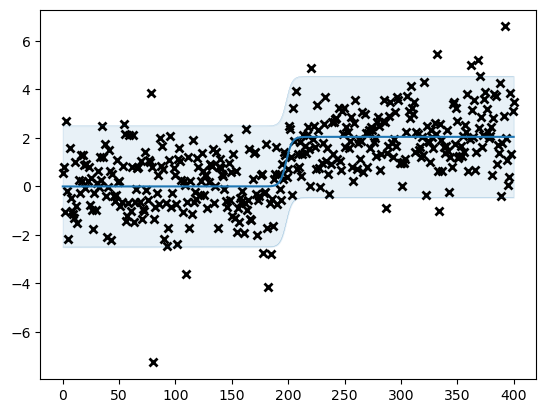

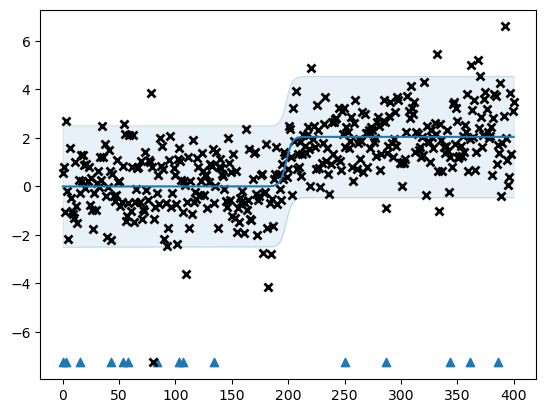

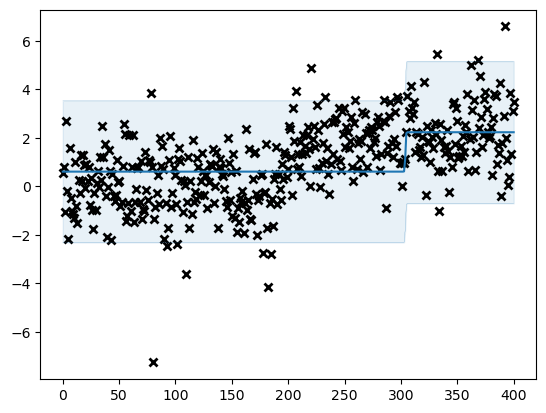

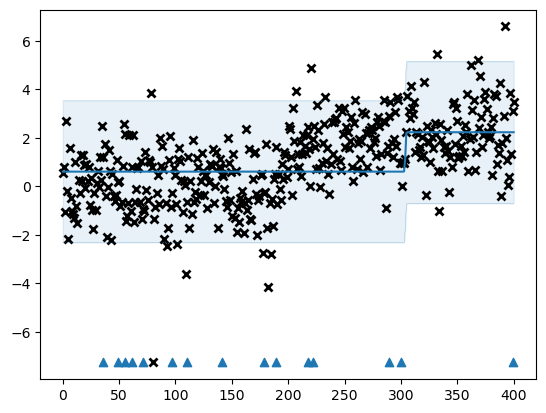

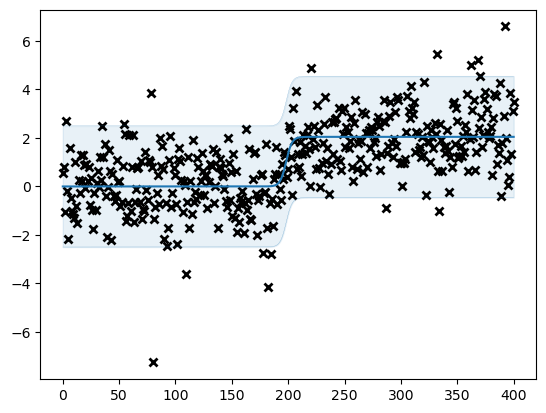

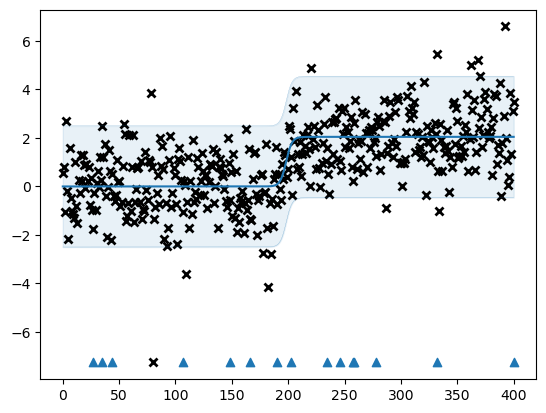

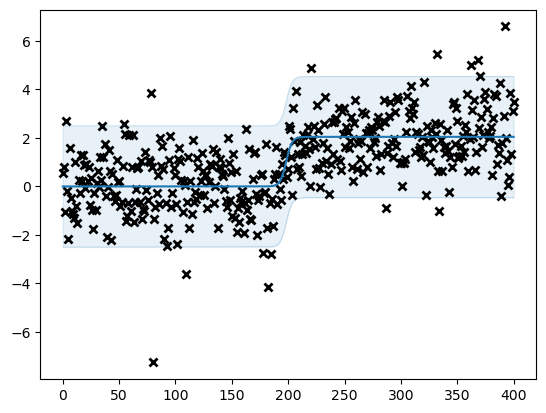

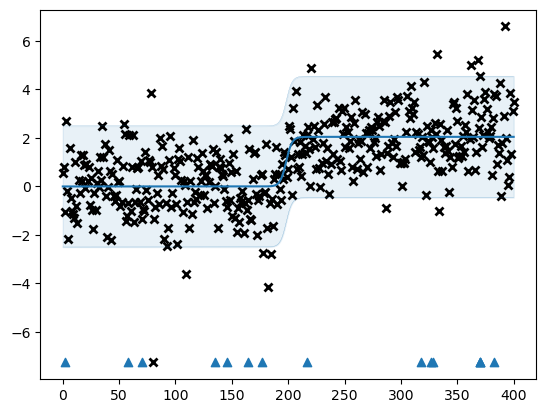

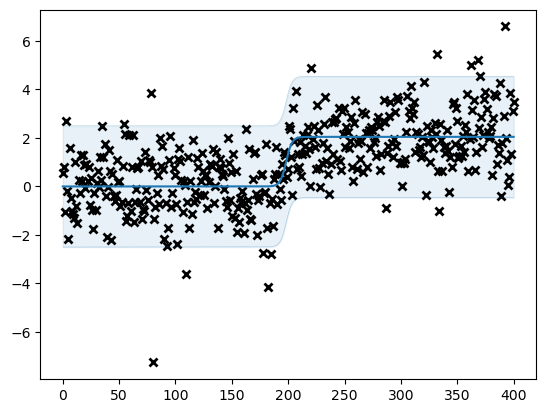

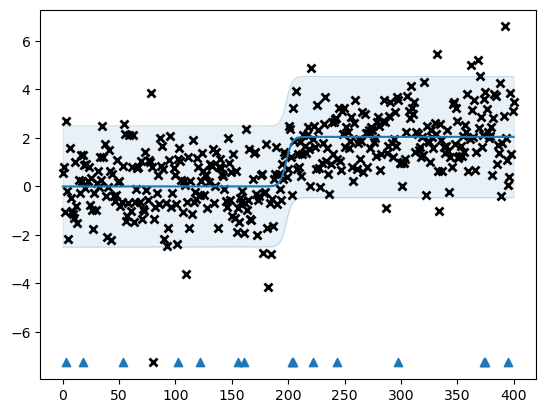

In [13]:
dists = []
for i in range(5):
    loc = np.random.randint(0, len(X))
    print(loc)
    k = gpf.kernels.ChangePoints([gpf.kernels.Constant() for i in range(2)], locations=[loc], steepness=1)
    k2 = gpf.kernels.ChangePoints([gpf.kernels.Constant() for i in range(2)], locations=[loc], steepness=1)
    gpr = gpf.models.GPR((X, y), kernel=k)
    iv = np.random.choice(X.flatten(), 15)[:,None]
    sgpr = gpf.models.SGPR((X, y), kernel=k2, inducing_variable=iv.reshape(-1, 1))


    gpr = plot_model(gpr)
    gpr.maximum_log_likelihood_objective()


    sgpr = plot_model(sgpr)
    sgpr.maximum_log_likelihood_objective()
    
    dists.append((loc, gpr.kernel.locations.numpy(), sgpr.kernel.locations.numpy()))


In [17]:
elbos = []
for loc in X:
    model = gpf.models.VGP(
        (X, y),
        kernel=gpf.kernels.ChangePoints(kernels=[gpf.kernels.Constant() for i in range(2)], locations=[20], steepness=[1]),
        likelihood=gpf.likelihoods.StudentT(),
    )
    plot_model(model, plot_model=False)
    elbos.append(model.maximum_log_likelihood_objective())
    

TypeError: plot_model() got an unexpected keyword argument 'plot_model'

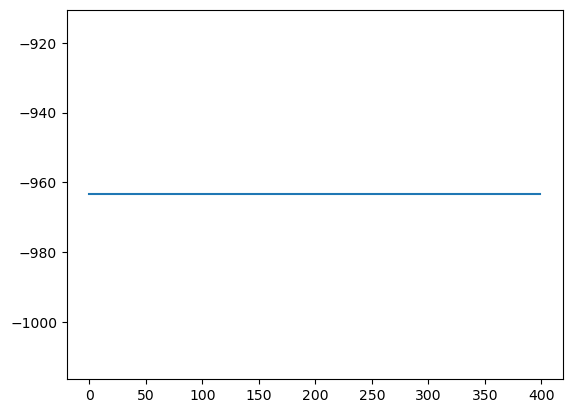

In [16]:
plt.plot(elbos)

In [ ]:
plot_model(model)

KeyboardInterrupt: 